In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as pl
import seaborn as sb
%matplotlib inline

In [26]:
data_train=pd.read_csv('data_train_processed.csv')

In [27]:
data_train=data_train.iloc[:,1:]

In [28]:
data_train.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Airline_Air India,Airline_GoAir,...,Total_Stops,Price,Duration_Hours,Duration_Min,Day_Of_Journey,Month_Of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,1,0,0,0,0,0,0,0,0,...,0,3897,2,50,24,3,22,20,1,10
1,0,0,0,0,0,0,1,0,1,0,...,2,7662,7,25,1,5,5,50,13,15
2,1,0,0,0,0,1,0,0,0,0,...,2,13882,19,0,9,6,9,25,4,25
3,0,0,0,0,0,0,1,0,0,0,...,1,6218,5,25,12,5,18,5,23,30
4,0,1,0,0,0,0,0,0,0,0,...,1,13302,4,45,1,3,16,50,21,35


In [29]:
data_train.columns

Index(['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops', 'Price', 'Duration_Hours', 'Duration_Min',
       'Day_Of_Journey', 'Month_Of_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [41]:
X=data_train.loc[:,['Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Total_Stops','Duration_Hours', 'Duration_Min',
       'Day_Of_Journey', 'Month_Of_Journey', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min']]


In [53]:
y=data_train.loc[:,['Price']]
np.reshape(np.array(y),(10681,))
y=np.ravel(y)

In [54]:
from sklearn.ensemble import ExtraTreesRegressor

In [55]:
sel=ExtraTreesRegressor()

In [56]:
sel.fit(X,y)

ExtraTreesRegressor()

In [57]:
print(sel.feature_importances_)

[4.91653882e-03 1.95179194e-02 8.52389759e-03 7.65832264e-04
 6.03908549e-04 6.95563850e-03 4.37436514e-03 9.20980035e-03
 7.37077606e-03 2.10337443e-03 1.66026132e-02 1.32041704e-01
 6.62218396e-02 1.94045437e-02 8.83286919e-04 5.36401770e-03
 1.10206853e-04 4.66376241e-03 6.13966739e-05 2.68883134e-01
 1.08083819e-01 1.77992554e-02 1.43596794e-01 5.79769230e-02
 2.40176647e-02 2.20004233e-02 2.81147972e-02 1.98317669e-02]


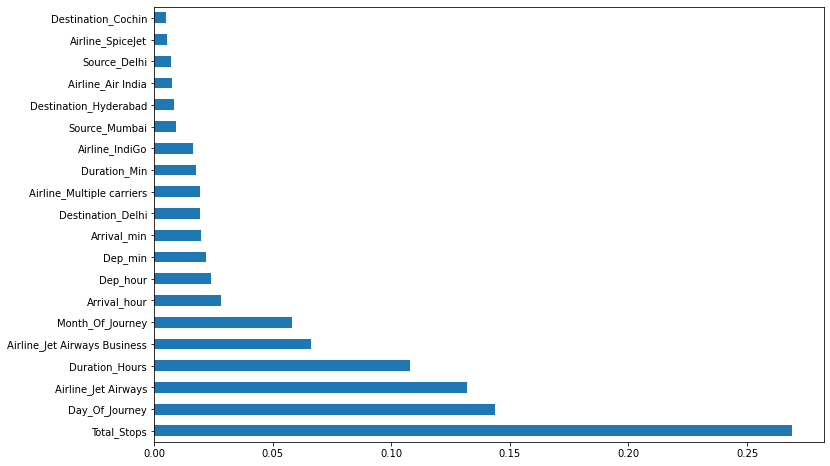

In [58]:
pl.figure(figsize = (12,8))
feat_importances = pd.Series(sel.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
pl.show()

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rfr=RandomForestRegressor()

In [63]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
y_pred=rfr.predict(X_test)

In [66]:
rfr.score(X_train,y_train)

0.9534137101239153

In [67]:
rfr.score(X_test,y_test)

0.7979726834920867

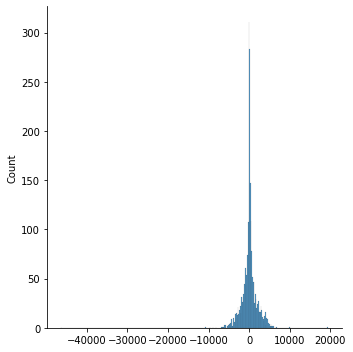

In [68]:
sb.displot(y_pred-y_test)

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [70]:
print(f"mse:{mean_absolute_error(y_test,y_pred)}")
print(f"mse:{mean_squared_error(y_test,y_pred)}")

mse:1148.6596443890562
mse:4237024.030194442


In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 90, stop = 1300, num = 14)]
# Number of features to consider at every split
max_features = ['auto', 'log']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100,25]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.3s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.3s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.3s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.3s
[CV] END max_depth=25, max_features=log, min_samples_leaf=2, min_samples_split=100, n_estimators=1020; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=741; total time=   9.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=741; total time=   6.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=100, 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'log'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              25],
                                        'n_estimators': [90, 183, 276, 369, 462,
                                                         555, 648, 741, 834,
                                                         927, 1020, 1113, 1206,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 648,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [80]:
rfr_new=rf_random.best_estimator_

In [81]:
rfr_new.score(X_test,y_test)

0.8127451182980316

In [82]:
pred=rfr_new.predict(X_test)

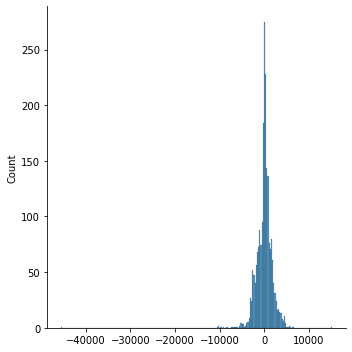

In [83]:
sb.displot(pred-y_test)

In [84]:
print(mean_absolute_error(pred,y_test))
print(mean_squared_error(pred,y_test))

1218.291829367842
3927208.692649148
